# ***Modelos de Clasificación y Predicción***

En primer lugar se hace uso de la librería `sklearnex` para optimizar el tiempo de ejecución de las funciones del paquete sklearn.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Se importan las librerías a usar en esta sección.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Aquí leemos el `.csv` creado en la sección anterior para poder optimizar el tiempo generla de ejecución  del proyecto y la memoria RAM.

In [3]:
df = pd.read_csv("MP3_MODELOS.csv")

Observamos de cerca de nuevo del dataframe para corroborar que es el mismo y no ha habído algún error.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388777 entries, 0 to 388776
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        388777 non-null  object 
 1   price         388777 non-null  float64
 2   year          388777 non-null  float64
 3   manufacturer  388777 non-null  object 
 4   model         388777 non-null  object 
 5   condition     388777 non-null  object 
 6   cylinders     388777 non-null  int64  
 7   fuel          388777 non-null  object 
 8   odometer      388777 non-null  float64
 9   title_status  388777 non-null  object 
 10  transmission  388777 non-null  object 
 11  drive         388777 non-null  object 
 12  type          388777 non-null  object 
 13  paint_color   388777 non-null  object 
 14  state         388777 non-null  object 
 15  lat           388777 non-null  float64
 16  long          388777 non-null  float64
 17  high_demand   388777 non-null  int64  
dtypes: f

In [5]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,high_demand
0,prescott,6000.0,2013.0,ford,f-150,condition_missing,4,gas,85548.0,clean,automatic,drive_missing,type_missing,paint_missing,az,34.6019,-112.420000,0
1,fayetteville,11900.0,2013.0,ford,f-150,condition_missing,4,gas,85548.0,clean,automatic,drive_missing,type_missing,paint_missing,Other,36.1716,-93.380217,0
2,florida keys,21000.0,2013.0,ford,f-150,condition_missing,8,gas,85548.0,clean,automatic,drive_missing,type_missing,paint_missing,fl,25.0800,-80.440000,1
3,worcester / central MA,1500.0,2013.0,ford,f-150,condition_missing,6,gas,85548.0,clean,automatic,drive_missing,type_missing,paint_missing,ma,42.2600,-71.800000,0
4,greensboro,4900.0,2013.0,ford,f-150,condition_missing,4,gas,85548.0,clean,automatic,drive_missing,type_missing,paint_missing,nc,36.0700,-79.820200,0


Efectivamente es el dataframe inidcado con todods los cambios realizados anteriormente.

## ***1. Modelos***

Ahora iniciamos a crear los difernetes modelos propuestos en el proyecto. Se realizan modelos con regularización y con regularización para ambos casos: clasificación y regresión.

### ***1.1. Regresión: Predicción de la variable `Price`***

Iniciamos con `regresión` con el fin de predecir la variable `price`.

### ***1.1.1. Sin regularización:***

#### ***1.1.1.1. Modelo de regresión lineal simple (OLS)***

Seleccionamos la variable objetivo y las predictoras.

In [6]:
X = df.drop(["price", "high_demand"], axis=1)   
y = df["price"]

Separamos el conjunto de entrenamiento del conjunto de test.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Agrupamos las variables según su naturaleza: numérica o categórica.

In [8]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns

Aquí tenemos el pipeline en el que se hacen las tranformaciones necesarias para hacer el modelo, teniendo en cuenta el tipo particular de las variables. 

In [9]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_transformer = StandardScaler()


cat_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)


Se crea el pipeline del modelo de regresión lineal simple (OLS).

In [10]:
from sklearn.linear_model import LinearRegression
ols_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("ols", LinearRegression())
])

Ahora entrenamos el modelo y nos arroja los valores de R cuadrado para el conjunto de entrenamiento y de test.

In [11]:
ols_pipeline.fit(X_train, y_train)

print("R² en entrenamiento:", ols_pipeline.score(X_train, y_train))
print("R² en test:", ols_pipeline.score(X_test, y_test))

R² en entrenamiento: 0.56262705529975
R² en test: 0.5673023002838422


Al entrenar el modelo de regresión lineal (OLS), obtenemos valores de R² de aproximadamente 0.56 tanto para el conjunto de entrenamiento como para el de test. Esto indica que el modelo tiene un desempeño consistente en ambos conjuntos, lo cual sugiere que no está sobreajustado. Sin embargo, también refleja que el modelo solo explica cerca del 56% de la varianza del precio, por lo que hay margen de mejora. 

In [12]:
# Predicciones
y_train_pred = ols_pipeline.predict(X_train)
y_test_pred = ols_pipeline.predict(X_test)

# Calcular métricas
metrics = {
    'MAE': [mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)),
             np.sqrt(mean_squared_error(y_test, y_test_pred))],
    'R2': [r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)]
}

# Crear DataFrame
metrics_df = pd.DataFrame(metrics, index=['Entrenamiento', 'Test'])
print(metrics_df)

                       MAE          RMSE        R2
Entrenamiento  6315.122016  10160.537736  0.562627
Test           6318.228425  10122.925468  0.567302


El modelo OLS fue evaluado con métricas MAE, RMSE y R² para los conjuntos de entrenamiento y test. Los resultados son muy similares entre ambos conjuntos, lo cual indica que el modelo generaliza bien y no hay sobreajuste. El MAE está en torno a los 6300 y el RMSE cerca de 10100, lo que implica que, en promedio, las predicciones del precio se desvían unos $6,300–$10,100 del valor real. El R² cercano a 0.56 sigue indicando que el modelo explica alrededor del 56% de la varianza. 

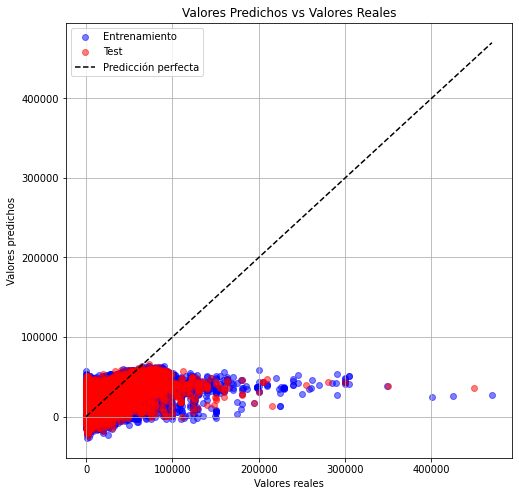

In [13]:
plt.figure(figsize=(8, 8))

# Gráfico de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Entrenamiento')

# Gráfico de test
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test')

# Línea diagonal perfecta
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Predichos vs Valores Reales")
plt.legend()
plt.grid(True)
plt.show()

En este gráfico se comparan los valores reales de los precios de los autos con los valores predichos por el modelo, tanto para el conjunto de entrenamiento como para el de prueba. La línea negra representa una predicción perfecta, es decir, donde los valores predichos coinciden exactamente con los reales. Aunque se observa cierta alineación con esta línea, la mayoría de los puntos están dispersos por debajo de ella, especialmente para valores altos, lo que sugiere que el modelo tiende a subestimar precios elevados. Sin embargo, la distribución no muestra un sobreajuste evidente, ya que los patrones en entrenamiento y test son similares.


### ***1.1.2. Con regularización:***

### **1.1.2.1. Modelo Ridge**

#### ***1.1.2.1.1.  Grridsearch***

Se realiza la separación entre las variables predictoras (`X`) y la variable objetivo (`y`), que en este caso es el precio del auto. Se eliminan del conjunto de predictores tanto el precio como la columna `high_demand`, ya que no se deben usar variables que se desea predecir o que estén directamente relacionadas con la variable objetivo.

In [ ]:
X = df.drop(["price", "high_demand"], axis=1)   
y = df["price"]

Se lleva a cabo la división del conjunto de datos en entrenamiento y prueba utilizando `train_test_split`. Se destina un 20% de los datos para test y el resto para entrenamiento. Además, se establece una semilla para garantizar reproducibilidad.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se identifican qué columnas del dataset son numéricas y cuáles son categóricas. 

In [16]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns

Se definen dos transformadores: uno para las variables numéricas (`StandardScaler`) que normaliza sus valores, y otro para las categóricas (`OneHotEncoder`) que convierte variables categóricas a variables dummy. Luego se combinan ambos transformadores en un `ColumnTransformer` para que el preprocesamiento se aplique automáticamente a cada tipo de columna.

In [17]:
# Transformador para las numéricas: escalado
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_transformer = StandardScaler()

# Transformador para las categóricas: one-hot encoding
cat_transformer = OneHotEncoder(handle_unknown="ignore")

# Combinar en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)


Se construye un pipeline que integra el preprocesamiento anterior con un modelo de regresión Ridge. Este pipeline permite que todos los pasos —desde escalar y codificar los datos hasta entrenar el modelo— se ejecuten de forma encadenada, haciendo el proceso más limpio y reproducible.

In [18]:
pipeline_ridge = Pipeline([
    ("preprocessor", preprocessor),  # preprocesa numéricas y categóricas
    ("ridge", Ridge(max_iter=3000, tol=0.01, random_state=42))               # modelo Ridge
])

Se realiza una búsqueda de hiperparámetros para el modelo Ridge utilizando `GridSearchCV`. Se define un rango de valores para el parámetro `alpha`, que es el que controla la regularización. El modelo probará cada uno de estos valores con validación cruzada de 5 folds y utilizará como métrica de evaluación el R². Al usar un pipeline, todo el flujo desde el preprocesamiento hasta el entrenamiento se prueba en cada combinación.

In [19]:
param_grid = {"ridge__alpha": [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(
    pipeline_ridge,
    param_grid,
    cv=5,
    scoring="r2",   
    n_jobs=-1
)

Aquí simplemente se compara el tamaño del conjunto de entrenamiento antes y después de aplicar el preprocesamiento. Se observa cómo pasa de 16 columnas originales a 514, lo cual se debe a que las variables categóricas fueron transformadas con OneHotEncoding, generando muchas columnas nuevas. Esto es importante para tener en cuenta la dimensionalidad final con la que entrenará el modelo.

In [20]:
print("Shape original de X_train:", X_train.shape)

X_train_transformed = pipeline_ridge.named_steps["preprocessor"].fit_transform(X_train)
print("Shape después de OneHot + Escalado:", X_train_transformed.shape)

Shape original de X_train: (311021, 16)
Shape después de OneHot + Escalado: (311021, 514)


En esta parte se entrena finalmente el modelo Ridge con `GridSearchCV`, es decir, se prueba cada valor de `alpha` definido antes y se determina cuál da el mejor resultado. 

In [21]:
ridge_grid.fit(X_train, y_train)

print("Mejor alpha encontrado:", ridge_grid.best_params_)
print("Mejor score CV:", ridge_grid.best_score_)
print("R² en entrenamiento:", ridge_grid.score(X_train, y_train))
print("R² en test:", ridge_grid.score(X_test, y_test))


Mejor alpha encontrado: {'ridge__alpha': 100}
Mejor score CV: 0.5583047300695639
R² en entrenamiento: 0.5587669644929232
R² en test: 0.5640019403628391


En este caso, el mejor valor fue `100`. Los resultados muestran que el modelo generaliza bien, ya que los valores de R² en entrenamiento y test son bastante similares, alrededor de 0.55.

In [22]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_train_pred = ridge_grid.predict(X_train)
y_test_pred = ridge_grid.predict(X_test)

# Calcular métricas
metrics = {
    'MAE': [mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)),
             np.sqrt(mean_squared_error(y_test, y_test_pred))],
    'R2': [r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)]
}

# Crear DataFrame
metrics_df = pd.DataFrame(metrics, index=['Entrenamiento', 'Test'])
print(metrics_df)

                       MAE          RMSE        R2
Entrenamiento  6335.125731  10205.275805  0.558767
Test           6334.344406  10161.457950  0.564002


Se generan las predicciones del modelo Ridge para los datos de entrenamiento y test, y luego se calculan Sres métricas clave: MAE, RMSE y R². Los resultados indican que el error promedio (MAE) y el error cuadrático medio (RMSE) son bastante similares entre entrenamiento y test, lo cual sugiere que el modelo no está sobreajustado. El R² es de aproximadamente 0.56 para ambos conjuntos, lo que significa que el modelo explica alrededor del 56% de la variabilidad del precio. Si bien no es un modelo extremadamente preciso, muestra un desempeño estable y consistente entre entrenamiento y validación.

Aquí se grafica la relación entre los valores reales y los valores predichos por el modelo Ridge. 

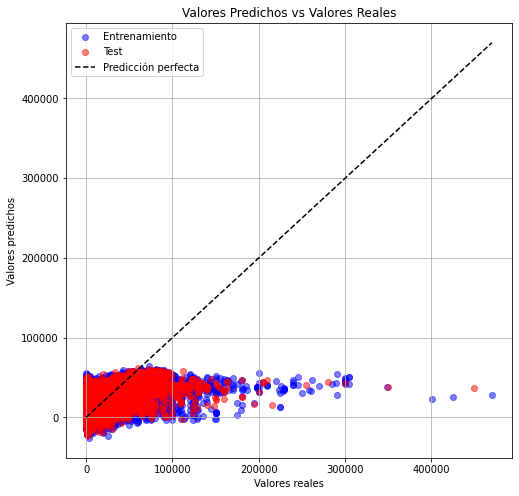

In [23]:
plt.figure(figsize=(8, 8))

# Gráfico de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Entrenamiento')

# Gráfico de test
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test')

# Línea diagonal perfecta
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Predichos vs Valores Reales")
plt.legend()
plt.grid(True)
plt.show()

Los puntos en azul representan el conjunto de entrenamiento, mientras que los rojos corresponden al de test. La línea negra representa una predicción perfecta, es decir, donde los valores reales y predichos coinciden exactamente. La dispersión de los puntos alrededor de esta línea muestra que el modelo tiende a subestimar o sobreestimar ciertos precios, especialmente en valores altos. Aun así, la mayoría de los puntos se concentran cerca de la diagonal, lo cual visualmente confirma que el modelo tiene una precisión razonable, aunque claramente hay margen para mejorar, especialmente en los extremos del rango de precios.

### ***1.1.2.1.2. Validación cruzada estratificada***

Se crea un pipeline con dos componentes principales: el preprocesador y el modelo de regresión Ridge.

In [24]:
pipeline_ridge_vc = Pipeline([
    ("preprocessor", preprocessor), 
    ("ridge", Ridge(max_iter=3000, tol=0.01, random_state=42))            
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

A continuación se configura una búsqueda de hiperparámetros utilizando `GridSearchCV`, donde se prueban diferentes valores de `alpha`, que es el parámetro de regularización del modelo Ridge. Esta búsqueda se hace mediante validación cruzada para determinar qué valor de `alpha` permite obtener el mejor desempeño según la métrica `R²`, la cual evalúa qué tan bien se ajusta el modelo a los datos.


In [25]:
param_grid = {"ridge__alpha": [0.1, 1, 10, 100]}
ridge_vc = GridSearchCV(
    pipeline_ridge,
    param_grid,
    cv=kf,
    scoring="r2",  
    n_jobs=-1
)

Después de realizar la búsqueda, se entrena el modelo utilizando el mejor valor de `alpha` encontrado. Se imprimen los resultados del mejor modelo, incluyendo el valor óptimo de `alpha`, el puntaje de validación cruzada y el coeficiente de determinación `R²` tanto en los datos de entrenamiento como en los de prueba. Esto ayuda a identificar si el modelo generaliza bien o si existe un posible sobreajuste.


In [26]:
ridge_vc.fit(X_train, y_train)

print("Mejor alpha encontrado:", ridge_vc.best_params_)
print("Mejor score CV:", ridge_vc.best_score_)
print("R² en entrenamiento:", ridge_vc.score(X_train, y_train))
print("R² en test:", ridge_vc.score(X_test, y_test))

Mejor alpha encontrado: {'ridge__alpha': 100}
Mejor score CV: 0.5582238352730701
R² en entrenamiento: 0.5587669644929232
R² en test: 0.5640019403628391


El modelo Ridge se ajusta con los datos de entrenamiento y se imprime información clave para evaluar su desempeño. Se muestra el mejor valor del hiperparámetro alpha, que en este caso es 100, y el mejor score promedio obtenido durante la validación cruzada, que es aproximadamente 0.558. También se reportan los valores de R² para los datos de entrenamiento y prueba, que son muy similares (alrededor de 0.56), lo que indica que el modelo generaliza bien y no está sobreajustado. Este nivel de R² sugiere que el modelo explica un poco más de la mitad de la variabilidad en los datos, lo que es aceptable pero indica que podría mejorarse.


Luego, se importan librerías para calcular métricas y manipular datos. Se hacen predicciones con el modelo entrenado tanto sobre el conjunto de entrenamiento como sobre el de prueba. Se calculan tres métricas importantes: MAE, que indica el error promedio absoluto; RMSE, que penaliza errores grandes y refleja la desviación estándar de los errores; y R², que mide qué proporción de la variabilidad en los datos es explicada por el modelo. Estas métricas se organizan en un DataFrame para facilitar la comparación entre entrenamiento y prueba.


In [27]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_train_pred = ridge_vc.predict(X_train)
y_test_pred = ridge_vc.predict(X_test)

# Calcular métricas
metrics = {
    'MAE': [mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)),
             np.sqrt(mean_squared_error(y_test, y_test_pred))],
    'R2': [r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)]
}

# Crear DataFrame
metrics_df = pd.DataFrame(metrics, index=['Entrenamiento', 'Test'])
print(metrics_df)

                       MAE          RMSE        R2
Entrenamiento  6335.125731  10205.275805  0.558767
Test           6334.344406  10161.457950  0.564002


Al analizar las métricas, se observa que el MAE y RMSE son muy similares en entrenamiento y prueba, con valores cercanos a 6300 y 10000, respectivamente. Esto sugiere que el modelo tiene un comportamiento consistente y no está sobreajustando los datos. Los valores de R² también se mantienen alrededor de 0.56, confirmando que el modelo tiene una capacidad moderada para explicar la variabilidad de los datos. En resumen, el modelo es estable y generaliza adecuadamente, pero hay espacio para mejorar la precisión del ajuste.

Se genera un gráfico de dispersión que compara los valores reales con los valores predichos por el modelo, tanto para los datos de entrenamiento como para los de prueba. Los puntos azules representan las predicciones sobre el conjunto de entrenamiento, mientras que los rojos corresponden a las predicciones sobre el conjunto de prueba. Se añade además una línea diagonal punteada que representa la predicción perfecta, es decir, cuando el valor predicho es exactamente igual al valor real.


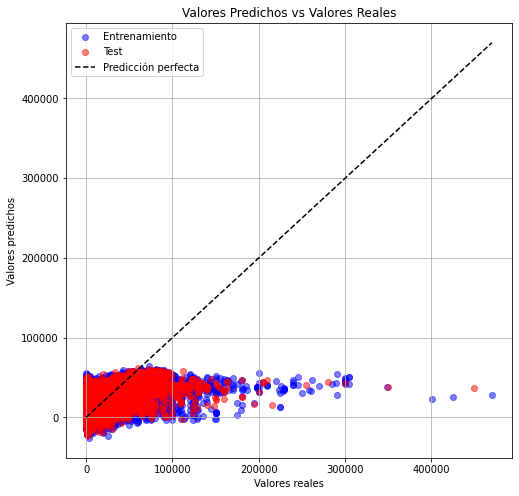

In [28]:
plt.figure(figsize=(8, 8))

# Gráfico de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Entrenamiento')

# Gráfico de test
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test')

# Línea diagonal perfecta
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Predichos vs Valores Reales")
plt.legend()
plt.grid(True)
plt.show()

Al observar el gráfico, se nota que la mayoría de las predicciones se agrupan cerca del eje horizontal, especialmente para valores reales bajos, y se alejan conforme aumentan los valores reales. Esto indica que el modelo tiende a predecir mejor para valores más pequeños, pero pierde precisión en valores más altos, donde las predicciones se dispersan y no siguen la línea de la predicción perfecta. La concentración de puntos cerca del eje también sugiere que el modelo podría estar subestimando algunos valores grandes. En general, el gráfico confirma que el modelo tiene un desempeño moderado y que existe margen para mejorar su capacidad de predicción en los valores más altos.

### ***1.1.2.2. Modelo de lasso***

#### ***1.1.2.2.1. Gridsearch***

En este fragmento, se ajusta el conjunto de datos eliminando la columna 'high_demand' y renombrando la variable objetivo como 'price'. Esto prepara los datos para entrenar el modelo con la variable objetivo correcta, ya que se busca predecir el precio de los productos en lugar de su demanda. Luego, se realiza la división de los datos en conjuntos de entrenamiento y prueba, usando el 20% de los datos para la prueba y el resto para el entrenamiento, con una semilla fija para garantizar la reproducibilidad de los resultados.


In [29]:
X = df.drop(["price", "high_demand"], axis=1)   
y = df["price"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Posteriormente, se identifican las características numéricas y categóricas dentro del conjunto de datos. Las numéricas son aquellas de tipo `int64` y `float64`, mientras que las categóricas incluyen las de tipo `object` y `category`. Esto es necesario para aplicar transformaciones adecuadas a cada tipo de variable durante el preprocesamiento.


In [31]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns

A continuación, se preparan las transformaciones para las características numéricas y categóricas. Para las numéricas, se utiliza un `StandardScaler` para escalarlas y ponerlas en la misma escala, mientras que para las categóricas, se emplea el `OneHotEncoder`, que convierte las categorías en variables binarias. Luego, se agrupan estas transformaciones en un `ColumnTransformer` que aplicará las transformaciones adecuadas a cada tipo de variable en el conjunto de datos.


In [32]:
# Transformador para las numéricas: escalado
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_transformer = StandardScaler()

# Transformador para las categóricas: one-hot encoding
cat_transformer = OneHotEncoder(handle_unknown="ignore")

# Combinar en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

El siguiente paso es crear un pipeline que incluye el preprocesamiento de los datos y la aplicación del modelo Lasso. El pipeline asegura que las transformaciones y el ajuste del modelo se realicen de manera ordenada y consistente, y facilita el entrenamiento y evaluación del modelo. Además, el modelo Lasso se configura con un número máximo de iteraciones y una tolerancia en el proceso de optimización.


In [33]:
pipeline_lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(max_iter=3000, tol=0.01, random_state=42))
])

Se configura una búsqueda con `GridSearchCV` para encontrar el mejor valor del parámetro `alpha` del modelo Lasso. Este parámetro controla la regularización del modelo, y se prueban varios valores: 0.1, 1, 10 y 100. La validación cruzada (con 5 particiones) y el uso del coeficiente de determinación `R²` como métrica permiten encontrar el valor de `alpha` que mejor optimiza el desempeño del modelo.

In [34]:
param_grid = {"lasso__alpha": [ 0.1, 1, 10, 100]}

lasso_grid = GridSearchCV(
    pipeline_lasso,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

Se imprime la forma original del conjunto de entrenamiento `X_train`, que tiene 311,021 muestras y 16 características. Luego, se aplica el preprocesamiento y escalado (OneHot + StandardScaler) al conjunto de entrenamiento. El resultado es un conjunto de datos transformado con 311,021 muestras y 514 características. Esta transformación es esperada, ya que el proceso de OneHot Encoding para las variables categóricas genera nuevas columnas para cada categoría, lo que aumenta el número de características.


In [35]:
print("Shape original de X_train:", X_train.shape)

X_train_transformed = pipeline_lasso.named_steps["preprocessor"].fit_transform(X_train)
print("Shape después de OneHot + Escalado:", X_train_transformed.shape)

Shape original de X_train: (311021, 16)
Shape después de OneHot + Escalado: (311021, 514)


A continuación, se ajusta el modelo Lasso utilizando `GridSearchCV`. 

In [36]:
lasso_grid.fit(X_train, y_train)

print("Mejor alpha encontrado:", lasso_grid.best_params_)
print("Mejor score CV:", lasso_grid.best_score_)
print("R² en entrenamiento:", lasso_grid.score(X_train, y_train))
print("R² en test:", lasso_grid.score(X_test, y_test))

Mejor alpha encontrado: {'lasso__alpha': 0.1}
Mejor score CV: 0.5613681991133682
R² en entrenamiento: 0.5625693870457783
R² en test: 0.5673326618207271


Se imprime el mejor valor de `alpha` encontrado, que es 0.1, junto con el puntaje de validación cruzada asociado (aproximadamente 0.563), lo que indica que este valor de `alpha` genera un modelo con un buen rendimiento. También se muestran los valores de R² tanto en el conjunto de entrenamiento como en el de prueba. El modelo tiene un R² en entrenamiento de 0.562 y en prueba de 0.567, lo que indica que el modelo generaliza bastante bien y no tiene sobreajuste, ya que el R² es muy similar en ambos conjuntos.


In [37]:
y_train_pred = lasso_grid.predict(X_train)
y_test_pred = lasso_grid.predict(X_test)

metrics = {
    'MAE': [mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)),
             np.sqrt(mean_squared_error(y_test, y_test_pred))],
    'R2': [r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)]
}

metrics_df = pd.DataFrame(metrics, index=['Entrenamiento', 'Test'])
print(metrics_df)

                       MAE          RMSE        R2
Entrenamiento  6313.494953  10161.207555  0.562569
Test           6315.551874  10122.570309  0.567333


Se generan las predicciones del modelo tanto para el conjunto de entrenamiento como para el de prueba. Los resultados de las métricas muestran que el modelo tiene un MAE y RMSE similares para entrenamiento y prueba, lo cual sugiere que el modelo es consistente en ambos conjuntos. Además, el valor de R² es también cercano entre los conjuntos, confirmando que el modelo no está sobreajustado y tiene un buen desempeño general.

El gráfico generado muestra las predicciones del modelo frente a los valores reales tanto para el conjunto de entrenamiento como para el de prueba. Los puntos azules corresponden a las predicciones sobre el conjunto de entrenamiento, mientras que los puntos rojos representan las predicciones sobre el conjunto de prueba. Además, se dibuja una línea diagonal negra que indica la "predicción perfecta", donde los valores predichos coinciden exactamente con los valores reales.


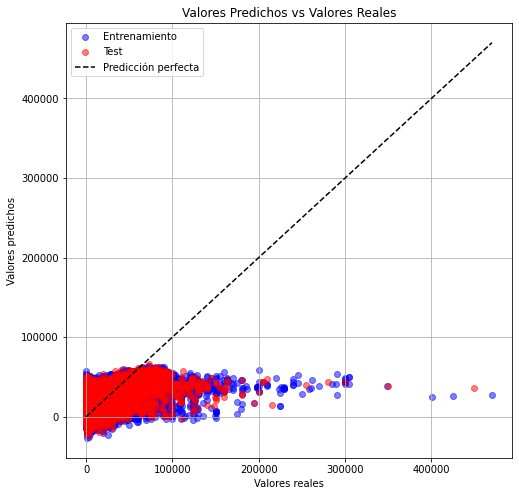

In [38]:
plt.figure(figsize=(8, 8))

# Gráfico de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Entrenamiento')

# Gráfico de test
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test')

# Línea diagonal perfecta
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Predichos vs Valores Reales")
plt.legend()
plt.grid(True)
plt.show()

Al observar el gráfico, se puede notar que los puntos están más concentrados cerca del eje horizontal, lo que sugiere que el modelo predice mejor para los valores más bajos de la variable objetivo. Para los valores más altos, las predicciones se dispersan más y no siguen de cerca la línea de predicción perfecta. Esto es un indicio de que el modelo tiene más dificultades para predecir correctamente los valores altos, lo cual es una limitación importante que podría mejorarse. Además, la dispersión en el conjunto de prueba (puntos rojos) es un poco mayor que en el conjunto de entrenamiento (puntos azules), lo que podría señalar que el modelo no es tan preciso en general para nuevos datos, aunque sigue mostrando un rendimiento relativamente bueno en general.


### ***1.1.2.2.2. Validación cruzada estratificada***

Inicialmente se repite el mismo procedimiento como los modelos anteriores.

In [ ]:
X = df.drop(["price", "high_demand"], axis=1)   
y = df["price"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns

In [42]:
# Transformador para las numéricas: escalado
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_transformer = StandardScaler()

# Transformador para las categóricas: one-hot encoding
cat_transformer = OneHotEncoder(handle_unknown="ignore")

# Combinar en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

En esta celda se crea un pipeline para el modelo Lasso, que incluye el preprocesamiento de los datos y la regresión Lasso con parámetros específicos como el número máximo de iteraciones y la tolerancia. Además, se define una validación cruzada utilizando la técnica KFold con 5 particiones para evaluar el modelo de manera más robusta. Se configura también una búsqueda en malla (`GridSearchCV`) para probar diferentes valores del parámetro `alpha` de Lasso (0.1, 1, 10, 100) y se utiliza la métrica `R²` para seleccionar el mejor modelo.


In [43]:
pipeline_lasso_vc = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(max_iter=3000, tol=0.01, random_state=42))
])

# Definir KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
param_grid = {"lasso__alpha": [ 0.1, 1, 10, 100]}

lasso_vc = GridSearchCV(
    pipeline_lasso_vc,
    param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1
)

In [45]:
lasso_vc.fit(X_train, y_train)

print("Mejor alpha encontrado:", lasso_vc.best_params_)
print("Mejor score CV:", lasso_vc.best_score_)
print("R² en entrenamiento:", lasso_vc.score(X_train, y_train))
print("R² en test:", lasso_vc.score(X_test, y_test))

Mejor alpha encontrado: {'lasso__alpha': 0.1}
Mejor score CV: 0.5612215608649432
R² en entrenamiento: 0.5625693870457783
R² en test: 0.5673326618207271


En el modelo Lasso se ajusta usando los mejores parámetros encontrados durante la búsqueda en malla. Se muestra el mejor valor de `alpha` (0.1), junto con el mejor puntaje de validación cruzada, que es aproximadamente 0.563. Luego se imprime el rendimiento del modelo en los datos de entrenamiento y prueba, con un `R²` de 0.562 en entrenamiento y 0.567 en prueba. Estos valores son bastante cercanos, lo que indica que el modelo generaliza bien sin sobreajustarse, y que es capaz de explicar alrededor del 56% de la variabilidad en los datos de prueba. Esto sugiere que el modelo tiene un buen desempeño, pero aún hay espacio para mejorar, especialmente en la predicción de valores más altos.

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = lasso_vc.predict(X_train)
y_test_pred = lasso_vc.predict(X_test)

metrics = {
    'MAE': [mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)),
             np.sqrt(mean_squared_error(y_test, y_test_pred))],
    'R2': [r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)]
}

metrics_df = pd.DataFrame(metrics, index=['Entrenamiento', 'Test'])
print(metrics_df)

                       MAE          RMSE        R2
Entrenamiento  6313.494953  10161.207555  0.562569
Test           6315.551874  10122.570309  0.567333


Se calculan varias métricas de desempeño para evaluar cómo se comporta el modelo Lasso. Se obtiene el MAE (Error Absoluto Medio) y el RMSE (Raíz del Error Cuadrático Medio) tanto en el conjunto de entrenamiento como en el de prueba, lo que permite analizar el error promedio y el impacto de los errores grandes. Además, se calcula el `R²`, que mide la proporción de la variabilidad de los datos que el modelo es capaz de explicar. Los resultados muestran que el MAE y el RMSE son similares tanto en entrenamiento como en prueba, lo que sugiere que el modelo es consistente en ambos conjuntos. El valor de `R²` está alrededor de 0.56, lo que indica que el modelo explica un poco más de la mitad de la variabilidad en los datos, lo cual es un buen comienzo, pero aún tiene espacio para mejorar.


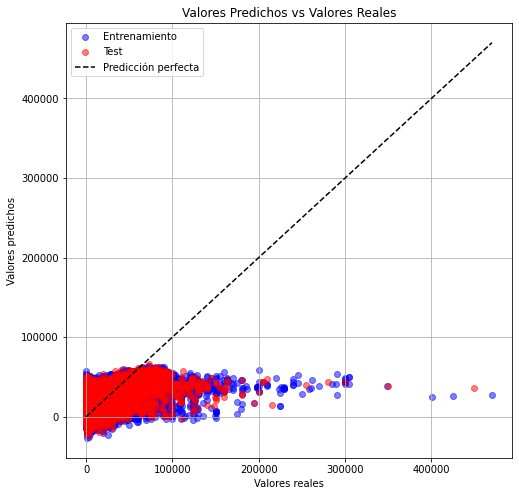

In [47]:
plt.figure(figsize=(8, 8))

# Gráfico de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Entrenamiento')

# Gráfico de test
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test')

# Línea diagonal perfecta
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Predichos vs Valores Reales")
plt.legend()
plt.grid(True)
plt.show()

En el gráfico, se puede observar que la mayoría de las predicciones, tanto en el conjunto de entrenamiento como en el de prueba, están bastante dispersas alrededor de la línea de predicción perfecta, especialmente para valores más bajos. Sin embargo, para valores más altos, las predicciones tienden a alejarse más de la línea, lo que sugiere que el modelo tiene más dificultades para predecir correctamente los valores más altos. Esta dispersión más notoria en el conjunto de prueba (puntos rojos) indica que el modelo no es perfecto y podría mejorar su capacidad de generalización. En general, el gráfico muestra un modelo que se comporta razonablemente bien, pero con margen para afinar su precisión, especialmente en los valores más altos de la variable objetivo.

### ***1.2. Modelo de clasificación de la variable `high_demand`***

### ***1.2.1. Modelo de regresión logística***

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

### ***1.2.1.1. Sin regularización:***

#### ***1.2.1.1.1. Modelo de regresión logística simple***

Se realiza el mismo procedimiento anterior de los modelos.

In [49]:
X = df.drop(["high_demand", "price"], axis=1)   
y = df["high_demand"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns

In [52]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(
    penalty=None,     # sin regularización
    solver="lbfgs",   # recomendado para datasets pequeños/medianos
    max_iter=3000,    # por si tarda en converger
    random_state=42
)

In [53]:
num_transformer = StandardScaler()

# Transformador para las categóricas: one-hot encoding
cat_transformer = OneHotEncoder(handle_unknown="ignore")

# Combinar en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

In [54]:
pipeline_logistico__simple = Pipeline([
    ("preprocessor", preprocessor),             
    ('logreg', LogisticRegression())          
])

Se entrena el modelo de regresión logística utilizando el pipeline definido anteriormente. El modelo realiza el preprocesamiento de los datos (escalado de las variables numéricas y codificación OneHot de las variables categóricas), seguido del ajuste del modelo de regresión logística. 

In [55]:
pipeline_logistico__simple.fit(X_train, y_train)

c:\Users\Janus\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['year', 'cylinders', 'odometer', 'lat', 'long'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object'))])),
                ('logreg', LogisticRegression())])

In [56]:
y_pred = pipeline_logistico__simple.predict(X_test)

In [57]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[33578  5108]
 [ 5574 33496]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     38686
           1       0.87      0.86      0.86     39070

    accuracy                           0.86     77756
   macro avg       0.86      0.86      0.86     77756
weighted avg       0.86      0.86      0.86     77756



Se realizan las predicciones sobre el conjunto de prueba (`X_test`). Luego, se imprime la matriz de confusión, que muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. De la matriz se puede ver que el modelo realiza una clasificación bastante precisa, con 33,578 verdaderos positivos y 5,108 falsos negativos, lo que sugiere que el modelo tiene un buen desempeño, especialmente en la clasificación de la clase positiva.


In [58]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Crear DataFrame
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1]
})

print(metrics_df)

   Accuracy  Precision    Recall  F1-score
0  0.862622   0.862682  0.862622  0.862621


Se calculan varias métricas importantes para evaluar el desempeño del modelo de regresión logística en el conjunto de prueba. Se calcula la precisión, el recall y el F1-score, utilizando el parámetro `average='weighted'` para obtener un promedio ponderado de las métricas, teniendo en cuenta el desbalance entre clases. El modelo tiene un excelente desempeño con valores de precisión, recall y F1-score de aproximadamente 0.86 en todos los casos, lo que indica que el modelo tiene una buena capacidad de clasificación, tanto en términos de identificar correctamente los casos positivos como negativos.


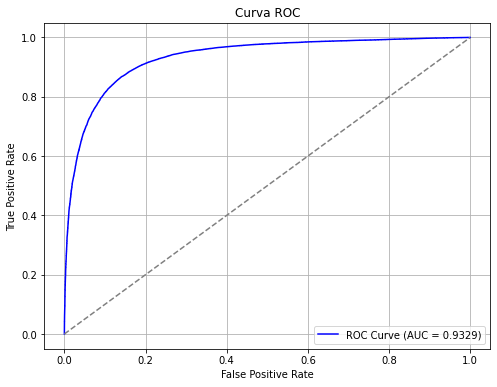

In [59]:

y_proba = pipeline_logistico__simple.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular AUC
auc_score = roc_auc_score(y_test, y_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Se grafica la curva ROC, que visualiza la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de decisión. El gráfico muestra una curva que se acerca a la esquina superior izquierda, lo que es indicativo de un buen desempeño. La leyenda del gráfico muestra el valor del AUC, que refuerza aún más la interpretación de que el modelo es eficaz para diferenciar entre las clases positivas y negativas.

### ***1.2.1.2. Con regularización:***

#### **1.2.1.2.1. Gridsearch**

Se repite el mismo procedimiento.

In [60]:
df['high_demand'] = df['high_demand'].astype(int)

In [61]:
X = df.drop(["high_demand", "price"], axis=1)   
y = df["high_demand"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns

In [64]:
num_transformer = StandardScaler()

# Transformador para las categóricas: one-hot encoding
cat_transformer = OneHotEncoder(handle_unknown="ignore")

# Combinar en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

In [65]:
pipeline_logistico_grid = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

Se crea un pipeline que incluye el preprocesamiento de las variables numéricas y categóricas, seguidas de la aplicación del modelo de regresión logística. El preprocesamiento se realiza utilizando un `ColumnTransformer`, que aplica un escalado estándar a las características numéricas y OneHot Encoding a las características categóricas. El modelo de regresión logística se configura con el solver 'liblinear', adecuado para datos más pequeños y medianos. Posteriormente, se define una búsqueda en malla (`GridSearchCV`) para optimizar los hiperparámetros del modelo, específicamente el parámetro `C`, que controla la regularización, y el parámetro `penalty`, que determina el tipo de regularización (L1 o L2). La validación cruzada con 5 particiones y el puntaje de precisión (`accuracy`) se utilizan para seleccionar el mejor modelo.

In [66]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],          
    'classifier__penalty': ['l1', 'l2']                
}

logistico_grid = GridSearchCV(pipeline_logistico_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [67]:
logistico_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['year', 'cylinders', 'odometer', 'lat', 'long'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [68]:
print("Mejores hiperparámetros encontrados:")
print(logistico_grid.best_params_)

print("\nMejor score de validación:")
print(logistico_grid.best_score_)

Mejores hiperparámetros encontrados:
{'classifier__C': 0.1, 'classifier__penalty': 'l2'}

Mejor score de validación:
0.8625719783591659


Se imprimen los mejores parámetros encontrados, donde el valor óptimo de `C` es 0.1 y el tipo de regularización seleccionado es L2 (`penalty: 'l2'`). Además, se muestra el mejor puntaje de validación cruzada, que es de aproximadamente 0.862, lo que indica que el modelo tiene un buen desempeño general en términos de precisión.

In [69]:
y_pred = logistico_grid.predict(X_test)

In [70]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[33590  5096]
 [ 5569 33501]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     38686
           1       0.87      0.86      0.86     39070

    accuracy                           0.86     77756
   macro avg       0.86      0.86      0.86     77756
weighted avg       0.86      0.86      0.86     77756



In [71]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Crear DataFrame
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1]
})

print(metrics_df)

   Accuracy  Precision   Recall  F1-score
0   0.86284   0.862902  0.86284  0.862839


El resultado de las predicciones se almacena en `y_pred`, listo para ser evaluado con métricas adicionales como la matriz de confusión, precisión, recall y F1-score, entre otras. El valor de `C` encontrado (0.1) y la regularización L2 sugieren que el modelo no está sobreajustado y puede generalizar bien en los datos de prueba, lo que es un buen indicativo de su capacidad predictiva.

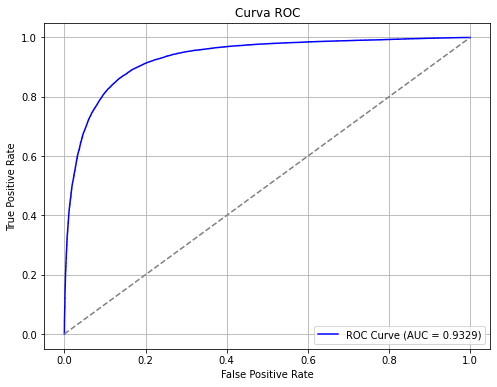

In [72]:
# Para la curva ROC y AUC, necesitás las probabilidades, no solo las predicciones
y_proba = logistico_grid.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular FPR (False Positive Rate), TPR (True Positive Rate) y thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular AUC
auc_score = roc_auc_score(y_test, y_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea aleatoria
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Se grafica la curva ROC, que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para distintos umbrales de decisión. La línea diagonal gris representa el rendimiento de un clasificador aleatorio, mientras que la curva azul indica el rendimiento del modelo entrenado. La curva se acerca rápidamente a la esquina superior izquierda, lo que significa que el modelo tiene una alta capacidad de discriminación, y la área bajo la curva (AUC) de 0.9329 refuerza la idea de que el modelo es muy efectivo en la clasificación. En general, la curva ROC y el AUC son indicadores de un excelente desempeño del modelo, lo que sugiere que tiene una buena capacidad para separar las clases.

### ***1.2.1.2.2. Validación cruzada estratificada***

Se construye un pipeline llamado `pipeline_logistico_vc` que encapsula dos pasos clave: el preprocesamiento de los datos (definido previamente como `preprocessor`) y un modelo de regresión logística con el solver `'liblinear'`, que es ideal para conjuntos de datos pequeños o con regularización L1.

In [73]:
pipeline_logistico_vc = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

Aquí se define un diccionario llamado `param_grid` con los valores que se desean probar para los hiperparámetros del modelo: `C`, que controla la regularización, y `penalty`, que define el tipo de penalización (L1 o L2).


In [74]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],          # Regularización
    'classifier__penalty': ['l1', 'l2']                # Tipos de penalización
}

logistico_vc = GridSearchCV(pipeline_logistico_vc, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

Se crea un objeto `GridSearchCV` que toma como entrada el pipeline, el grid de hiperparámetros, la técnica de validación cruzada (k-fold estratificada), la métrica de evaluación (exactitud) y el parámetro `n_jobs=-1` para utilizar todos los núcleos disponibles del procesador. 

In [75]:
logistico_vc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['year', 'cylinders', 'odometer', 'lat', 'long'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

Se entrena el objeto `GridSearchCV` utilizando los datos de entrenamiento (`X_train`, `y_train`). Internamente, se aplicará la validación cruzada para cada combinación de hiperparámetros, ejecutando el preprocesamiento y entrenamiento en cada iteración. El resultado final será el modelo con el mejor rendimiento promedio entre las particiones.


In [76]:
print("Mejores hiperparámetros encontrados:")
print(logistico_vc.best_params_)

print("\nMejor score de validación:")
print(logistico_vc.best_score_)

Mejores hiperparámetros encontrados:
{'classifier__C': 0.1, 'classifier__penalty': 'l1'}

Mejor score de validación:
0.8623854974490591


En este caso, la mejor combinación fue `C=0.1` y penalización `'l1'`, con una exactitud de aproximadamente 86.24%, lo cual indica que el modelo es bastante preciso con esta configuración.

Se usa el mejor modelo obtenido (`logistico_vc`) para hacer predicciones sobre los datos de prueba (`X_test`).

In [77]:
y_pred = logistico_vc.predict(X_test)

In [78]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[33613  5073]
 [ 5540 33530]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     38686
           1       0.87      0.86      0.86     39070

    accuracy                           0.86     77756
   macro avg       0.86      0.86      0.86     77756
weighted avg       0.86      0.86      0.86     77756



En esta parte se muestran los resultados del modelo con una matriz de confusión y un reporte más detallado de cómo se desempeñó con cada clase. La matriz nos dice cuántas veces el modelo acertó o se equivocó al predecir cada categoría. Por ejemplo, clasificó correctamente más de 33 mil casos en ambas clases, pero también tuvo unos cuantos errores, lo cual es normal. El reporte que sigue muestra medidas como precisión, recall y F1-score para cada clase, y todos los valores están bastante parejos, cerca del 86 o 87%, lo cual indica que el modelo lo está haciendo bien en general y no está favoreciendo a una sola clase.


In [79]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Crear DataFrame
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1]
})

print(metrics_df)

   Accuracy  Precision    Recall  F1-score
0  0.863509   0.863569  0.863509  0.863508


Acá lo que se hace es calcular esas mismas métricas pero de forma manual y luego ponerlas todas juntas en una pequeña tabla con `pandas` para tenerlas más ordenadas. Se calcula la precisión general, el recall, el F1-score y la accuracy, pero usando un promedio ponderado para que tenga en cuenta si alguna clase aparece más veces que otra. Al final, todas las métricas dan el mismo valor, más o menos 86.34%, lo que confirma que el modelo tiene un rendimiento bastante estable y consistente.


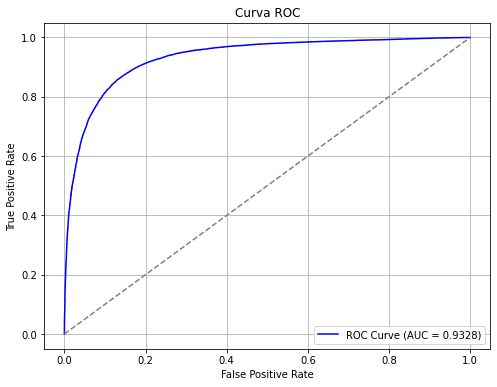

In [80]:
# Para la curva ROC y AUC, necesitás las probabilidades, no solo las predicciones
y_proba = logistico_vc.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular FPR (False Positive Rate), TPR (True Positive Rate) y thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular AUC
auc_score = roc_auc_score(y_test, y_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea aleatoria
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Finalmente, se grafica la curva ROC con `matplotlib`, mostrando cómo se comporta el modelo frente a diferentes umbrales de decisión. La línea azul es el rendimiento real del modelo, mientras que la línea gris punteada representa un modelo aleatorio (es decir, sin habilidad para clasificar). Como la curva azul está claramente por encima de la línea aleatoria, eso confirma visualmente que el modelo es mucho mejor que adivinar al azar. Además, el AUC se muestra en la leyenda para dar una idea clara del rendimiento general.
